## **SFS Sequential Feature Selection / for AD, FA, RD.... CC1 to CC7**
automatic bac selection from 20 to 3 features

In [4]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
from math import log
import scipy.stats as scs
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import warnings

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

warnings.filterwarnings('ignore')

cwd = os.getcwd()
print(cwd)
pathfile=r'D:\DATA\Aging_DTI_SHARED_NEW'
pathfile=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/'
os.chdir(pathfile)

addtocc='_40old' #addtocc='_46removed'
addtocc='_all' #addtocc='_46removed'
addtocc='_all_woimputed' #addtocc='_46removed'



SubjectTable_imputed = pd.read_csv('Subject_preproc'+addtocc+'.csv', sep=",")

savenamefeaturelist=addtocc[1:]+'_SavedFeaturesSelectedBackward20to2_CC'

print('Loading files : ')
print('Subject_preproc'+addtocc+'.csv')
print('Feature list save in files : ')
print(savenamefeaturelist)

dti_metric_list=['FA']

dti_metric=0
dti_metric_list=[0]
dti_metric_list_str=['FA']

CCx_list=['CC_1','CC_2','CC_3','CC_4','CC_5','CC_6','CC_7']



print(pathfile, 'CC_X_'+dti_metric_list_str[dti_metric]+addtocc+'.csv')

SubjectTable_imputed


/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW
Loading files : 
Subject_preproc_all_woimputed.csv
Feature list save in files : 
all_woimputed_SavedFeaturesSelectedBackward20to2_CC
/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/ CC_X_FA_all_woimputed.csv


,sub,age,JND_P,group_O,group_Y,group,sex
0,1.0,25.0,9.560000,0.0,1.0,Y,F
1,2.0,27.0,6.690000,0.0,1.0,Y,M
2,3.0,28.0,12.920000,0.0,1.0,Y,F
3,5.0,21.0,1.950000,0.0,1.0,Y,F
4,6.0,25.0,2.540000,0.0,1.0,Y,F
5,8.0,67.0,4.480000,1.0,0.0,O,F
6,9.0,73.0,9.630000,1.0,0.0,O,M
7,10.0,64.0,7.270000,1.0,0.0,O,F
8,11.0,21.0,1.620000,0.0,1.0,Y,F
9,12.0,21.0,3.680000,0.0,1.0,Y,M


In [5]:

import array as arr
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
cwd = os.getcwd()

def SFS(dfCCx,nfeaturesfs,directionsfs, nclustersfs):
    CCx_SelectedFeat=[]
    scaler = StandardScaler()
    dfCCx_scaled = scaler.fit_transform(dfCCx)
    dfCCx_scaled_df = pd.DataFrame(dfCCx_scaled, columns=dfCCx.columns)
    dfCCx_scaled_df.head()
    kmeans = KMeans(n_clusters=nclustersfs, random_state=42)
    sfs = SequentialFeatureSelector(kmeans, n_features_to_select=nfeaturesfs, direction=directionsfs)
    sfs.fit(dfCCx_scaled_df)
    CCx_SelectedFeat=sfs.get_support(indices=True)
    return CCx_SelectedFeat

SubjectTable_imputed
CCx_list


['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7']

In [6]:

for ccxID in range(1,8):

    file_path_ccx=os.path.join(pathfile, 'CC_'+str(ccxID)+'_'+dti_metric_list_str[dti_metric]+addtocc+'.csv')
    print(file_path_ccx)
    dfCCx= pd.read_csv(file_path_ccx, sep=",")
 
    print(dfCCx.shape)


    # Initialize an empty list of lists
    list_of_selfeatures = []
    # Define the number of empty sublists you want
    num_sublists = 21
    # Append empty lists to the main list using a loop
    for _ in range(num_sublists):
        list_of_selfeatures.append([])

    for i in [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2]:
        CCx_SelectedFeat=SFS(dfCCx,i,'backward',2)
        dfCCx=dfCCx.iloc[:, CCx_SelectedFeat]
        list_of_selfeatures[i]=dfCCx.columns
        print('CC_'+str(ccxID)+' '+dti_metric_list_str[dti_metric]+' '+ str(dfCCx.columns))

    np.save(savenamefeaturelist +str(ccxID) +'_FA.npy',np.array(list_of_selfeatures, dtype=object),allow_pickle=True)





/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/CC_1_FA_all_woimputed.csv
(41, 98)
CC_1 FA Index(['9', '24', '25', '26', '27', '28', '30', '32', '33', '35', '54', '55',
       '67', '73', '74', '75', '76', '85', '92', '93'],
      dtype='object')
CC_1 FA Index(['9', '24', '25', '26', '27', '28', '30', '32', '33', '35', '54', '55',
       '67', '73', '74', '75', '76', '85', '92'],
      dtype='object')
CC_1 FA Index(['9', '24', '25', '26', '27', '28', '30', '32', '33', '35', '54', '55',
       '67', '73', '74', '75', '85', '92'],
      dtype='object')
CC_1 FA Index(['9', '24', '25', '26', '27', '28', '30', '32', '33', '35', '54', '55',
       '67', '73', '74', '75', '92'],
      dtype='object')
CC_1 FA Index(['9', '24', '25', '26', '27', '28', '32', '33', '35', '54', '55', '67',
       '73', '74', '75', '92'],
      dtype='object')
CC_1 FA Index(['9', '25', '26', '27', '28', '32', '33', '35', '54', '55', '67', '73',
       '74',

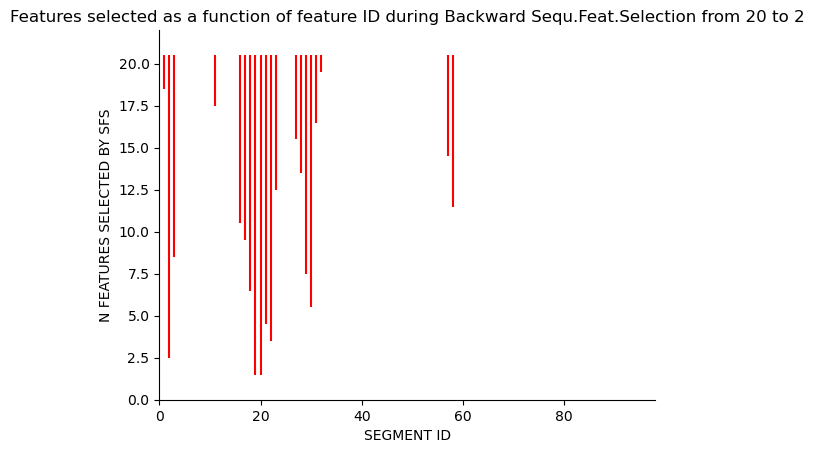

In [10]:


list_of_selfeatures=np.load(savenamefeaturelist +str(ccxID) +'_FA.npy',allow_pickle=True)

fig, axs = plt.subplots()

for i in [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2]:
    x=[i]*len(list_of_selfeatures[i])
    y=np.zeros(len(list_of_selfeatures[i]))
    for k in range(len(list_of_selfeatures[i])):
        y[k]=int(list_of_selfeatures[i][k])
        list(list_of_selfeatures[i])
        # create a vertical plot
    axs.eventplot(y, colors='red', lineoffsets=i,linelengths=1, orientation='horizontal')
    axs.set_xlabel("SEGMENT ID", fontsize=10)
    axs.set_ylabel("N FEATURES SELECTED BY SFS", fontsize=10)
    axs.set_title('Features selected as a function of feature ID during Backward Sequ.Feat.Selection from 20 to 2', fontsize=12)
    axs.set_xlim(0,98)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)

CC_4 FA Index(['14', '15', '16', '18', '38', '39', '40', '41', '42', '43', '51', '53',
       '54', '55', '71', '72', '75', '76', '91', '95'],
      dtype='object')
CC_4 FA Index(['14', '15', '16', '18', '38', '39', '40', '41', '42', '43', '51', '54',
       '55', '71', '72', '75', '76', '91', '95'],
      dtype='object')
CC_4 FA Index(['14', '15', '16', '18', '38', '39', '40', '41', '42', '43', '51', '54',
       '55', '71', '72', '75', '76', '91'],
      dtype='object')
CC_4 FA Index(['14', '15', '16', '18', '39', '40', '41', '42', '43', '51', '54', '55',
       '71', '72', '75', '76', '91'],
      dtype='object')
CC_4 FA Index(['14', '15', '16', '18', '39', '40', '41', '42', '43', '51', '55', '71',
       '72', '75', '76', '91'],
      dtype='object')
CC_4 FA Index(['14', '15', '16', '18', '39', '40', '41', '42', '43', '51', '55', '71',
       '72', '75', '76'],
      dtype='object')
CC_4 FA Index(['14', '15', '16', '18', '40', '41', '42', '43', '51', '55', '71', '72',
       '75', 

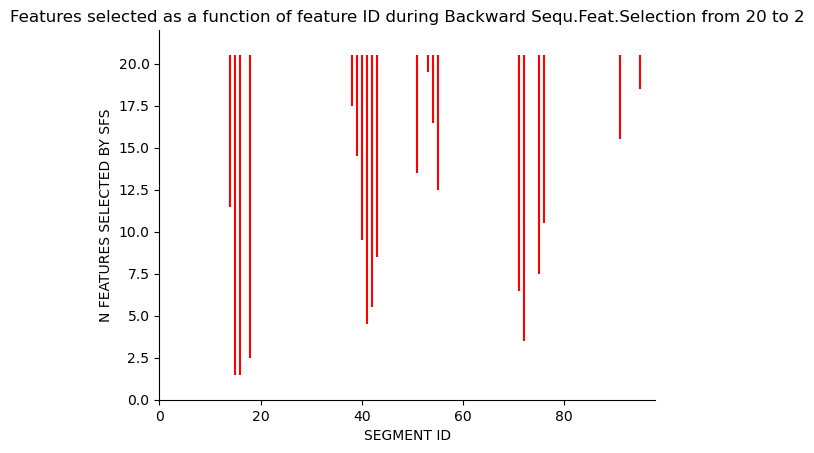